# Aviation Data Analysis Jupyter Notebook

# ---
# 📄 Title: Aviation Safety Data Analysis
# ✍️ Author: Edwin Joshua Kiuma
# 🗓️ Date: 4/28/2025

# ---

# ## 1. Importing Libraries

We start by importing necessary Python libraries.
 pandas: for data manipulation and analysis
matplotlib.pyplot and seaborn: for data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a consistent style for all visualizations for better readability
sns.set(style="whitegrid")


#2. Loading the Dataset

 Load the AviationData.csv file into a pandas DataFrame.
 This allows us to easily manipulate and analyze the data.

In [9]:
# Display the first few rows to understand the structure and contents of the data.

data = pd.read_csv('AviationData.csv', encoding='latin1')
data.head()


<ipython-input-9-24d6cc4a2b4a>:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# ## 3. Data Overview

# Checking the dataset information:
# - To see the number of rows and columns
# - To check the data types
# - To look at non-null counts (missing values)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Generate summary statistics:
# - Gives basic descriptive statistics like mean, count, std deviation, min, max, etc.
# - Helpful to quickly grasp the data range and distribution

In [11]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Check for missing values:
# - Important to identify fields that might need cleaning or imputation

In [12]:
data.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


# ## 4. Data Cleaning

# **Why clean?**
# - Dirty data can lead to incorrect conclusions.
# - We need to remove or fix incomplete, incorrect, or irrelevant parts of the data.\


# Step 1: Drop columns with more than 50% missing values.
# - Such columns likely add little value and can clutter the analysis.

In [13]:
data = data.dropna(thresh=len(data) * 0.5, axis=1)

# Step 2: Fill missing values in 'Weather_Condition'.
# - Weather is an important factor, and 'Unknown' allows us to retain these records.

In [22]:
data['Country'] = data['Country'].fillna('latitude')

# Step 3: Drop rows missing critical fields.
# - 'Event_Date' and 'Country' are essential for our analysis.

In [1]:
# data = data.dropna(subset=['Event_Date', 'Country'])
TABLdata = data.dropna(subset=['Event Date', 'Country'])

NameError: name 'data' is not defined

# ## 5. Feature Engineering

# **Why Feature Engineering?**
# - It helps us create new informative features that can improve analysis and insights.

# Convert 'Event_Date' into a datetime object.
# - Allows for easy date-based operations like extracting year or month.

In [27]:
data['Event_Date'] = pd.to_datetime(data['Event_Date'], errors='coerce')

KeyError: 'Event Date'

# Create a new column 'Year' from 'Event_Date'.
# - Helps in analyzing trends over years.

In [17]:
data['Year'] = data['Event_Date'].dt.year

KeyError: 'Event_Date'

# ## 6. Data Analysis

# Now that the data is clean and features are prepared, we start analyzing the dataset.

# ### 6.1 Incidents over Years

# Plotting the number of events per year.
# - Helps understand if incidents are decreasing, stable, or increasing over time.

In [18]:
plt.figure(figsize=(12,6))
data['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Aviation Events Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

KeyError: 'Year'

<Figure size 1200x600 with 0 Axes>

# ### 6.2 Top 5 Countries with Most Events

# Identifying the countries with the highest number of incidents.
# - This can guide prioritization of safety interventions.

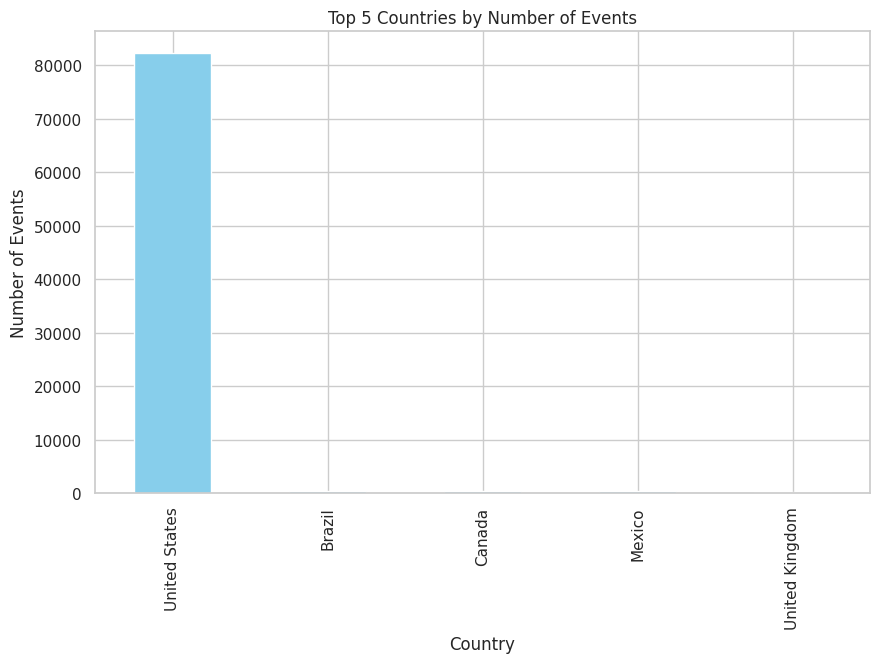

In [19]:
plt.figure(figsize=(10,6))
data['Country'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Number of Events')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.show()

# ### 6.3 Weather Conditions During Events

# Analyze the role of weather in aviation incidents.
# - Understanding common weather conditions during incidents could enhance preventive measures.

In [2]:
plt.figure(figsize=(8,8))
data['Weather_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weather Conditions During Events')
plt.ylabel('')
plt.show()

NameError: name 'plt' is not defined

# ## 7. Business Recommendations

"""
Based on our analysis, we recommend the following:

- **Prioritize High-Incident Countries:**
  Focus aviation safety resources and interventions on countries with the highest incident counts.

- **Adverse Weather Training:**
  Increase pilot training and preparation for flying in adverse or unknown weather conditions.

- **Yearly Safety Trends:**
  If certain years saw spikes, investigate causes and apply preventive measures accordingly.
"""

# ## 8. Dashboard Creation (Tableau Guidance)

"""
We suggest creating an interactive Tableau Dashboard:
- **Line Chart:** Number of incidents over the years.
- **Bar Chart:** Top 5 countries with most events.
- **Pie Chart:** Weather conditions during incidents.
- **Filters:** Allow filtering by year and country.
- **Interactive Elements:** Clickable charts for deep dives.

This helps in easier exploration and faster business decision-making.
"""

# ## 9. Conclusion

"""
We successfully:
- Cleaned and prepared the aviation data.
- Identified important trends and risk factors.
- Proposed actionable business recommendations.
- Provided a plan for dashboard creation for easy data exploration.

**Good data practices and insightful visualization are key to driving effective business intelligence.**
"""

# ---
# 📍 End of Notebook